In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load Data
df = pd.read_csv('../input/wine-preferences/tweets_sentiment.csv')
df.head()

,Unnamed: 0,username,description,date,location,following,followers,totaltweets,retweet,retweetcount,text,hashtags,brand,color,country,location_country,location_city,sentiment
0,0,1267886436080107521,Get your store up: https://t.co/qf78jAU5eo,2022-10-03 18:06:57,United States,15,41,6223,False,0,repurposedupcycled green wine bottle base glas...,"['Repurposedupcycled', 'Glasses', 'set', 'Bott...",NaN,NaN,NaN,['United States'],[],0
1,1,406344750,"The Best Tasting Wine Shop, a retail store wit...",2022-10-03 18:05:51,302 Pier Avenue,1939,995,2839,False,0,thanks much linda uncorked uncorkedwineshops w...,"['Uncorked', 'UncorkedWineShops', 'wineshop', ...",NaN,NaN,NaN,[],['Avenue'],0
2,2,83460300,Love wine... Love champagne... Love life...,2022-10-03 18:05:48,"Sydney, Australia",1107,589,3456,False,0,louis jadot charmes chambertin grand cru gtgtg...,"['AD', 'wine', 'redwine', 'whitewine', 'whisky']",NaN,['red'],NaN,['Australia'],['Sydney'],1
3,3,853779552329502720,We tweet and retweet all things cool and inter...,2022-10-03 18:05:07,NaN,362,191,61865,False,7,deals events make feel larger life httpstcoscc...,"['soulnightevents', 'party']",NaN,NaN,NaN,NaN,NaN,1
4,4,838972202,"Serial entrepreneur, that's taken two successf...",2022-10-03 18:05:05,"Delray Beach, FL",1029,8772,16697,False,0,become wine influencer six figures per year wi...,"['wine', 'winelovers', 'winetasting', 'wineisf...",NaN,NaN,NaN,[],"['Delray Beach', 'Beach']",1


## Preprocessing of columns 

In [3]:
# Columns of interest: location, text, hashtags,
#brands, color, location_country, location_city
df.columns

Index(['Unnamed: 0', 'username', 'description', 'date', 'location',
       'following', 'followers', 'totaltweets', 'retweet', 'retweetcount',
       'text', 'hashtags', 'brand', 'color', 'country', 'location_country',
       'location_city', 'sentiment'],
      dtype='object')

In [4]:
df[['text', 'hashtags', 'brand',
       'color','location_country', 'location_city']].dtypes

text                object
hashtags            object
brand               object
color               object
location_country    object
location_city       object
dtype: object

In [5]:
# Convert list to strings separated with ','
def extract_elements(l):
    if l == None or l == [] or type(l) == float:
        return None
    return l[2:-2]

In [6]:
# Country_Location pre-processing

print(df['location_country'].value_counts())
print('\nNumber of None values:', sum(df['location_country'].isna()), '\n')
df['location_country'] = [extract_elements(l) for l in df['location_country']]
df['location_country']

[]                    3885
['United Kingdom']     209
['United States']      194
['Australia']          149
['South Africa']       125
                      ... 
['KENYA']                1
['Yemen']                1
['Argentina']            1
['FRANCE']               1
['Liechtenstein']        1
Name: location_country, Length: 80, dtype: int64

Number of None values: 1418 



0       United States
1                    
2           Australia
3                None
4                    
            ...      
6519             None
6520             None
6521                 
6522                 
6523                 
Name: location_country, Length: 6524, dtype: object

In [7]:
# City_location pre-processing
print(df['location_city'].value_counts())
print('\nNumber of None values:', sum(df['location_city'].isna()), '\n')
df['location_city'] = [extract_elements(l) for l in df['location_city']]
df['location_city']

[]                        1794
['Virginia']               168
['England']                 92
['Los Angeles']             80
['London']                  72
                          ... 
['Edmonton', 'Canada']       1
['Henley', 'Thames']         1
['Derby', 'England']         1
['Ayr', 'Scotland']          1
['Riverside']                1
Name: location_city, Length: 917, dtype: int64

Number of None values: 1418 



0                            
1                      Avenue
2                      Sydney
3                        None
4       Delray Beach', 'Beach
                ...          
6519                     None
6520                     None
6521                         
6522                         
6523                         
Name: location_city, Length: 6524, dtype: object

In [8]:
# Brand pre-processing
print(df['brand'].value_counts())
print('\nNumber of None values:', sum(df['brand'].isna()), '\n')
df['brand'] = [extract_elements(l) for l in df['brand']]
df['brand']

['chardonnay']                                                     128
['pinot', 'noir']                                                  100
['cabernet', 'sauvignon']                                           60
['merlot']                                                          47
['syrah']                                                           34
['pinot']                                                           30
['chardonnay', 'pinot', 'cabernet', 'tempranillo']                  29
['cabernet']                                                        27
['sauvignon']                                                       26
['tempranillo']                                                     16
['chardonnay', 'pinot', 'cabernet', 'noir', 'tempranillo']           8
['chardonnay', 'pinot', 'noir']                                      6
['cabernet', 'merlot']                                               5
['cabernet', 'merlot', 'sauvignon']                                  4
['char

0       None
1       None
2       None
3       None
4       None
        ... 
6519    None
6520    None
6521    None
6522    None
6523    None
Name: brand, Length: 6524, dtype: object

In [9]:
# Color pre-processing
print(df['color'].value_counts())
print('\nNumber of None values:', sum(df['color'].isna()), '\n')
df['color'] = [extract_elements(l) for l in df['color']]
df['color']

['red']                     247
['white']                   120
['rose']                     46
['red', 'white']             21
['red', 'rose']               5
['red', 'white', 'rose']      2
Name: color, dtype: int64

Number of None values: 6083 



0       None
1       None
2        red
3       None
4       None
        ... 
6519    None
6520    None
6521    rose
6522    rose
6523    None
Name: color, Length: 6524, dtype: object

## Categorical 2 numerical fearures
To convert all the features to numerical type.
1. One hot encoding
2. Label encoding

After the conversion, it is possible to plot the feature vectors of tweets and colour them according to their sentiment analysis tag. 

1. convert features to numeric
2. PCA (2 and 3)
3. Plot

If clusters are formed, we can study if they have any relationship with the type of wine/sentiment associated.

Possible **features** for **tweeter data**: _location_, _hashtags_, _brand_, _color_, _location_country_, _location_city_

In [10]:
# One-hot encoding 
one_hot_feat = df[['brand','color','location_country', 'location_city']]
one_hot_feat = pd.get_dummies(one_hot_feat)
one_hot_feat.head()
# TOO SPARSE

,brand_cabernet,"brand_cabernet', 'merlot","brand_cabernet', 'merlot', 'sauvignon","brand_cabernet', 'sauvignon","brand_cabernet', 'sauvignon', 'tempranillo","brand_cabernet', 'syrah","brand_cabernet', 'tempranillo",brand_chardonnay,"brand_chardonnay', 'cabernet","brand_chardonnay', 'cabernet', 'merlot', 'sauvignon",...,location_city_Worcester,location_city_Yakima,location_city_York,location_city_Yorkshire,"location_city_Yorkshire', 'England",location_city_Youngstown,location_city_Yountville,location_city_Zagreb,location_city_Zelienople,location_city_Zumbrota
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Label encoding
features_of_interest = ['brand','color','location_country','location_city']
label_feat = pd.DataFrame()
for feature in features_of_interest:
    label_feat[feature] = df[feature].astype('category')
    label_feat[feature] = label_feat[feature].cat.codes
label_feat.head()

,brand,color,location_country,location_city
0,-1,-1,72,0
1,-1,-1,0,46
2,-1,0,4,785
3,-1,-1,-1,-1
4,-1,-1,0,232


## PCA

In [21]:
# PCA
from sklearn.decomposition import PCA

# Returns the embeddings after PCA
def PCA_converter(ncomp, embs):
    pca = PCA(n_components=ncomp)
    embs_pca = pca.fit_transform(embs)
    return pca.explained_variance_ratio_, embs_pca

In [22]:
# Reduce one_hot and label encoding with PCA (2 & 3)
one_hot_feat_matrix = one_hot_feat.to_numpy()
exp_var_one_hot_2, one_hot_2pca = PCA_converter(2, one_hot_feat_matrix)
exp_var_one_hot_3, one_hot_3pca = PCA_converter(3, one_hot_feat_matrix)


label_feat_matrix = label_feat.to_numpy()
exp_var_label_2, label_2pca = PCA_converter(2, label_feat_matrix)
exp_var_label_3, label_3pca = PCA_converter(3, label_feat_matrix)


# Create dataframe with [PCA_1, PCA_2]
one_hot_2pca_coords = pd.DataFrame(one_hot_2pca, columns = ['x', 'y'])
one_hot_3pca_coords = pd.DataFrame(one_hot_3pca, columns = ['x', 'y', 'z'])

label_2pca_coords = pd.DataFrame(label_2pca, columns = ['x', 'y'])
label_3pca_coords = pd.DataFrame(label_3pca, columns = ['x', 'y', 'z'])

# Add Sentiment label (2 artificial categories to plot an example)
one_hot_2pca_coords['sentiment'] = df.sentiment
one_hot_3pca_coords['sentiment'] = df.sentiment
label_2pca_coords['sentiment'] = df.sentiment
label_3pca_coords['sentiment'] = df.sentiment

## Plot

In [106]:
# coords: df with coordinates 'x','y'
# cmap: dictionary with label:color conversion
# label: label column
# title: plot title
# xlabel: x_label title
# ylabel: y_label title
def d2_plot(coords, cmap, label, title, xlabel, ylabel, exp_var_2):
    fig = plt.figure(figsize=(7,5))
    ax = fig.add_subplot()

    for l in np.unique(label):
        ix=np.where(label==l)
        ax.scatter(coords.loc[ix, 'x'], coords.loc[ix, 'y'], c=cmap[l], s=40)
    # for loop ends
    ax.set_xlabel(xlabel+"  (" + str(round(exp_var_2[0]*100,2)) + "%)", fontsize=14)
    ax.set_ylabel(ylabel+"  (" + str(round(exp_var_2[1]*100,2)) + "%)", fontsize=14)
    ax.set_title(title)
    
    colors = {'negative': 'red', 'positive':'green'}
    markers = [plt.Line2D([0,0],[0,0], color=color, marker='o', linestyle='') for color in colors.values()]
    plt.legend(markers, colors.keys(), numpoints=1, loc='upper left')
    plt.show()

# coords: df with coordinates 'x','y','z'
# cmap: dictionary with label:color conversion
# label: label column
# title: plot title
# xlabel: x_label title
# ylabel: y_label title
# zlabel: z_label title
def d3_plot(coords, cmap, label, title, xlabel, ylabel, zlabel, exp_var_3):
    fig = plt.figure(figsize=(7,5))
    ax = fig.add_subplot(111, projection='3d')
    
    fig.patch.set_facecolor('white')
    for l in np.unique(label):
        ix=np.where(label==l)
        ax.scatter(coords.loc[ix, 'x'], coords.loc[ix, 'y'], coords.loc[ix, 'z'], c=cmap[l], s=40)
    # for loop ends
    ax.set_xlabel(xlabel+"  (" + str(round(exp_var_3[0]*100,2)) + "%)", fontsize=14)
    ax.set_ylabel(ylabel+"  (" + str(round(exp_var_3[1]*100,2)) + "%)", fontsize=14)
    ax.set_zlabel(zlabel+"  (" + str(round(exp_var_3[2]*100,2)) + "%)", fontsize=14)
    ax.set_title(title)
    colors = {'negative': 'red', 'positive':'green'}
    markers = [plt.Line2D([0,0],[0,0], color=color, marker='o', linestyle='') for color in colors.values()]
    plt.legend(markers, colors.keys(), numpoints=1, loc='upper left')
    plt.show()

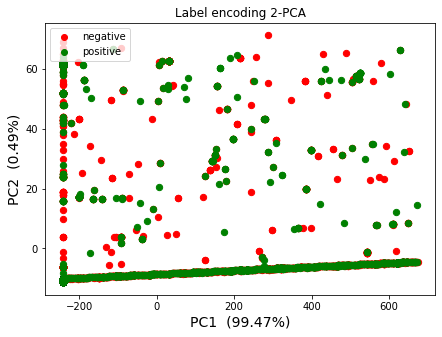

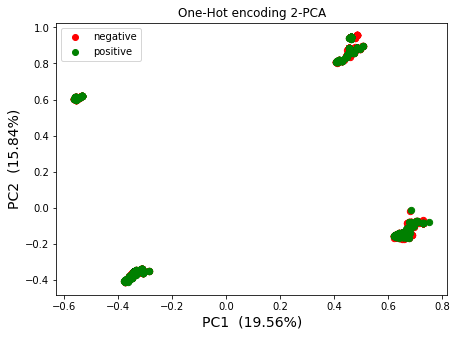

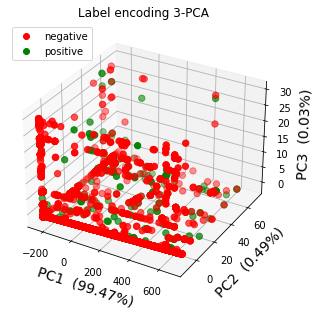

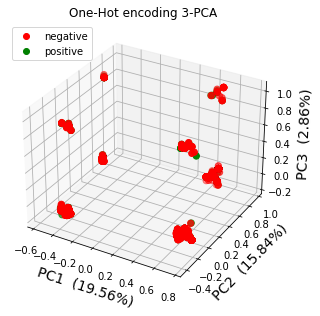

In [107]:
cmap = {0: 'red', 1:'green'}
xlabel = "PC1"
ylabel = "PC2"
zlabel = "PC3"

d2_plot(label_2pca_coords, cmap, label_2pca_coords.sentiment, 'Label encoding 2-PCA', xlabel, ylabel, exp_var_label_2)
d2_plot(one_hot_2pca_coords, cmap, one_hot_2pca_coords.sentiment, 'One-Hot encoding 2-PCA', xlabel, ylabel, exp_var_one_hot_2)
d3_plot(label_3pca_coords, cmap, label_3pca_coords.sentiment, 'Label encoding 3-PCA', xlabel, ylabel, zlabel, exp_var_label_3)
d3_plot(one_hot_3pca_coords, cmap, one_hot_3pca_coords.sentiment, 'One-Hot encoding 3-PCA', xlabel, ylabel, zlabel, exp_var_one_hot_3)

## Country

In [96]:
label_feat = pd.DataFrame(df["location_country"], columns = ["location_country"])
label_feat['sentiment'] = df.sentiment

In [97]:
country_sentiment = label_feat.groupby('location_country').mean().sort_values('sentiment')

counts = label_feat.groupby('location_country').count().sort_values('sentiment')

country_sentiment.head()

,sentiment
location_country,
philippines,0.0
Liechtenstein,0.0
Iraq,0.0
Luxembourg,0.0
Madagascar,0.0


In [98]:
print(counts[counts["sentiment"] > 16])

                     sentiment
location_country              
New Zealand                 19
Spain                       21
Ireland                     29
India                       32
Italy                       36
France', 'Argentina         44
Canada                      58
France                      61
South Africa               125
Australia                  149
United States              194
United Kingdom             209
                          3885


In [99]:
country_sentiment = country_sentiment[counts.sentiment > 16]
country_sentiment = country_sentiment.drop(index=[''])
country_sentiment

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,sentiment
location_country,
Australia,0.046980
New Zealand,0.157895
Canada,0.275862
United States,0.283505
United Kingdom,0.339713
Ireland,0.344828
South Africa,0.352000
Italy,0.361111
India,0.375000


In [100]:
count_neg = (1-country_sentiment['sentiment'])
count_neg

location_country
Australia              0.953020
New Zealand            0.842105
Canada                 0.724138
United States          0.716495
United Kingdom         0.660287
Ireland                0.655172
South Africa           0.648000
Italy                  0.638889
India                  0.625000
France                 0.590164
Spain                  0.571429
France', 'Argentina    0.500000
Name: sentiment, dtype: float64

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.


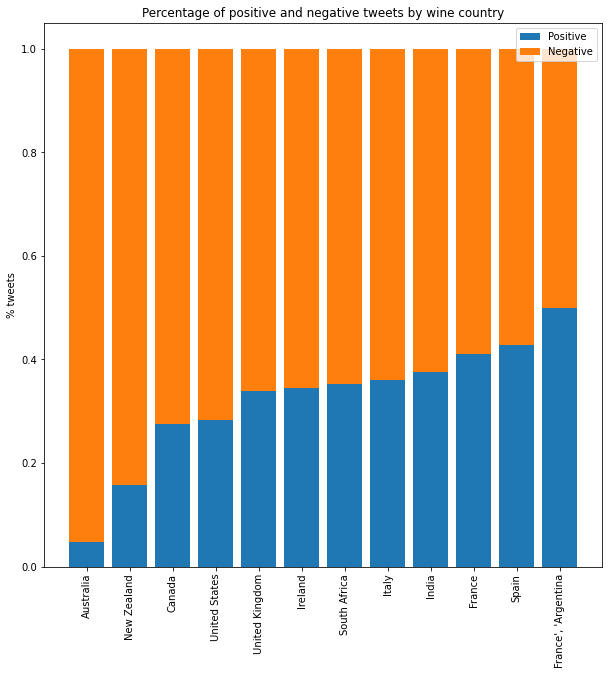

In [101]:
from matplotlib.pyplot import figure
fig, ax = plt.subplots()

ax.bar(country_sentiment.index, country_sentiment['sentiment'], label='Positive')
ax.bar(country_sentiment.index, count_neg, label='Negative', bottom=country_sentiment["sentiment"])

ax.set_ylabel('% tweets')
ax.set_title('Percentage of positive and negative tweets by wine country')
ax.legend()
ax.set_xticklabels(country_sentiment.index, rotation=90)

fig.set_figwidth(10)
fig.set_figheight(10)

plt.show()

## Brand

In [35]:
label_feat = pd.DataFrame(df["brand"], columns = ["brand"])
label_feat['sentiment'] = df.sentiment

In [36]:
country_sentiment = label_feat.groupby('brand').mean().sort_values('sentiment')

counts = label_feat.groupby('brand').count().sort_values('sentiment')

country_sentiment.head()

,sentiment
brand,
"pinot', 'sauvignon",0.0
"pinot', 'noir', 'syrah",0.0
"cabernet', 'sauvignon', 'tempranillo",0.0
"pinot', 'merlot",0.0
"noir', 'syrah",0.0


In [37]:
print(counts)

                                                    sentiment
brand                                                        
chardonnay', 'tempranillo                                   1
pinot', 'sauvignon                                          1
cabernet', 'sauvignon', 'tempranillo                        1
cabernet', 'tempranillo                                     1
pinot', 'noir', 'syrah                                      1
chardonnay', 'cabernet', 'merlot', 'sauvignon               1
chardonnay', 'merlot', 'syrah                               1
pinot', 'merlot                                             1
pinot', 'noir', 'sauvignon                                  1
chardonnay', 'cabernet', 'sauvignon                         2
garnacha                                                    2
chardonnay', 'syrah                                         2
chardonnay', 'cabernet                                      2
noir', 'syrah                                               2
noir    

In [38]:
country_sentiment = country_sentiment[counts.sentiment > 16]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [39]:
count_neg = (1-country_sentiment['sentiment'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.


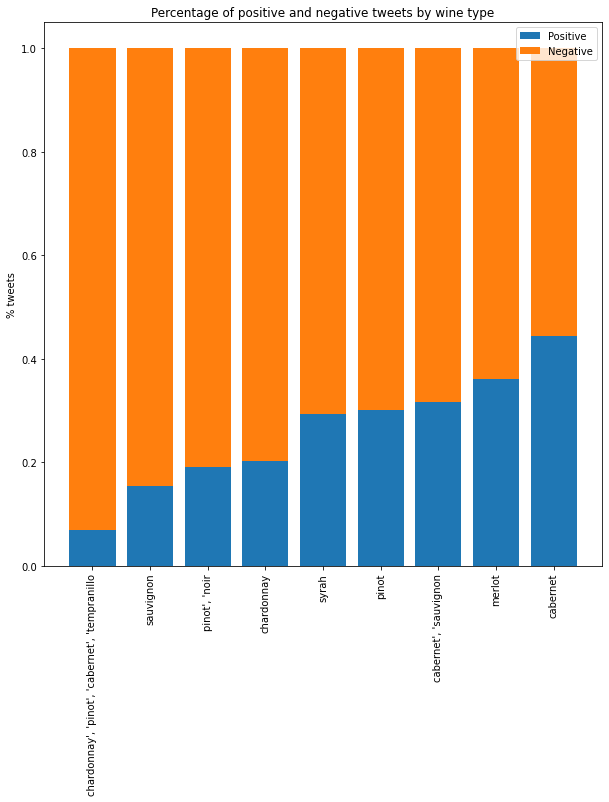

In [40]:
from matplotlib.pyplot import figure
fig, ax = plt.subplots()

ax.bar(country_sentiment.index, country_sentiment['sentiment'], label='Positive')
ax.bar(country_sentiment.index, count_neg, label='Negative', bottom=country_sentiment["sentiment"])

ax.set_ylabel('% tweets')
ax.set_title('Percentage of positive and negative tweets by wine type')
ax.legend()
ax.set_xticklabels(country_sentiment.index, rotation=90)

fig.set_figwidth(10)
fig.set_figheight(10)

plt.show()

## Color

In [41]:
label_feat = pd.DataFrame(df["color"], columns = ["color"])
label_feat['sentiment'] = df.sentiment

In [42]:
country_sentiment = label_feat.groupby('color').mean().sort_values('sentiment')

counts = label_feat.groupby('color').count().sort_values('sentiment')

country_sentiment.head()

,sentiment
color,
white,0.241667
rose,0.326087
"red', 'white",0.380952
red,0.408907
"red', 'white', 'rose",0.500000


In [43]:
print(counts)

                      sentiment
color                          
red', 'white', 'rose          2
red', 'rose                   5
red', 'white                 21
rose                         46
white                       120
red                         247


In [44]:
country_sentiment = country_sentiment[counts.sentiment > 40]
count_neg = (1-country_sentiment['sentiment'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.


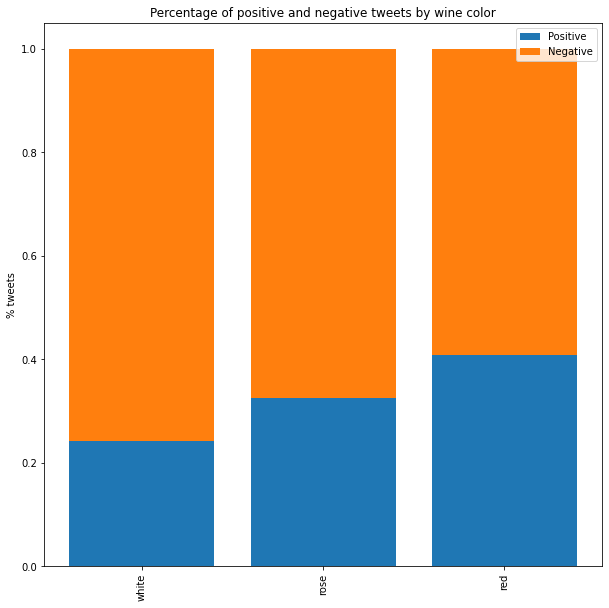

In [46]:
from matplotlib.pyplot import figure
fig, ax = plt.subplots()

ax.bar(country_sentiment.index, country_sentiment['sentiment'], label='Positive')
ax.bar(country_sentiment.index, count_neg, label='Negative', bottom=country_sentiment["sentiment"])

ax.set_ylabel('% tweets')
ax.set_title('Percentage of positive and negative tweets by wine color')
ax.legend()
ax.set_xticklabels(country_sentiment.index, rotation=90)

fig.set_figwidth(10)
fig.set_figheight(10)

plt.show()